# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [24]:
import sqlite3 as sl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [25]:
# create dataframes from my excel file 
sales = pd.read_excel('SalesJournal 2005-2021.xlsx',sheet_name=0,index_col=0)
cust = pd.read_excel('SalesJournal 2005-2021.xlsx',sheet_name=1,index_col=0)
                   

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [26]:
#look at the sales file
sales.head(5)

,Account ID,Account Description,Invoice/CM #,Date,Debit Amnt,Credit Amnt,Last Inv Date,Sales Rep ID,Job ID
Customer ID,,,,,,,,,
WATERO,30020,Sales - Turf Repair,37144,2020-04-01,NaN,2607.75,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
WATERO,30020,Sales - Turf Repair,37147,2020-04-01,NaN,3806.04,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
WATERO,30020,Sales - Turf Repair,37148,2020-04-02,NaN,2070.17,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
WATERO,30020,Sales - Turf Repair,37155,2020-04-03,NaN,3558.18,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
WATERO,30020,Sales - Turf Repair,37172,2020-04-10,NaN,2825.81,2021-12-29,JAMESV,"20001-02JV,15-Turf Repair,00-REVENUE"


In [27]:
#look at the customer file
cust.head(5)

,Customer,Cust Since,City,State,Zip,Cust Type,Active?,Sales Rep,Sales Acct
Customer ID,,,,,,,,,
103,DBSI Discover Real Estate Services,2008-07-21,Overland Park,KS,66210,COMM,Active,GCP3,30900
10975,DBSI Discover Real Estate Services,2008-07-21,Overland Park,Ks,66210,NaN,Active,GCP3,30900
1509WALN,"1509 WALNUT, LLC",2018-12-12,KANSAS CITY,MO,64106,SNOW,Active,SNOW,30800
1617,1617 S POLLARD,2008-07-15,NaN,NaN,NaN,NaN,Inactive,NaN,30200
1906WYAN,"1906 WYANDOTTE, LLC",2019-01-28,Kansas City,MO,64108,SNOW,Active,SNOW/GEORGE,30800


In [28]:
# How big is my customer file?
cust.shape

(4039, 9)

In [29]:
# How big is my sales file?
sales.shape

(58231, 9)

In [30]:
print(cust.isnull().sum()) # How many nulls in my cust columns

Customer         3
Cust Since       0
City            21
State           21
Zip             31
Cust Type     3194
Active?          0
Sales Rep     2391
Sales Acct       0
dtype: int64


In [31]:
print(sales.isnull().sum()) # How many nulls in my sales columns


Account ID                 0
Account Description        0
Invoice/CM #               0
Date                       0
Debit Amnt             56641
Credit Amnt             1591
Last Inv Date              0
Sales Rep ID             271
Job ID                   696
dtype: int64


In [32]:
# look at data types
cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4039 entries, 103 to ZUCK
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Customer    4036 non-null   object        
 1   Cust Since  4039 non-null   datetime64[ns]
 2   City        4018 non-null   object        
 3   State       4018 non-null   object        
 4   Zip         4008 non-null   object        
 5   Cust Type   845 non-null    object        
 6   Active?     4039 non-null   object        
 7   Sales Rep   1648 non-null   object        
 8   Sales Acct  4039 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 315.5+ KB


In [33]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58231 entries, WATERO to ELITE
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Account ID           58231 non-null  int64         
 1   Account Description  58231 non-null  object        
 2   Invoice/CM #         58231 non-null  object        
 3   Date                 58231 non-null  datetime64[ns]
 4   Debit Amnt           1590 non-null   float64       
 5   Credit Amnt          56640 non-null  float64       
 6   Last Inv Date        58231 non-null  datetime64[ns]
 7   Sales Rep ID         57960 non-null  object        
 8   Job ID               57535 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 4.4+ MB


In [34]:
sales.describe()

,Account ID,Debit Amnt,Credit Amnt
count,58231.000000,1590.000000,56640.000000
mean,30555.483591,1031.742094,892.951052
std,290.208320,3502.748222,3053.545354
min,30020.000000,0.010000,0.010000
25%,30200.000000,105.000000,85.000000
50%,30800.000000,249.540000,207.500000
75%,30810.000000,540.000000,610.000000
max,30900.000000,61515.000000,213110.000000


In [35]:
# Any duplicate rows in cust?
duplicate_rows_df = cust[cust.duplicated()]
print(duplicate_rows_df.shape)

(5, 9)


In [36]:
# Any duplicate cols in cust?
dup_rows_df = sales[sales.duplicated()]
print(dup_rows_df.head(5))

             Account ID  Account Description Invoice/CM #       Date  \
Customer ID                                                            
WALJ              30100     Sales - Lighting         8121 2006-03-01   
ANAN              30100     Sales - Lighting        17572 2009-08-31   
NEWB              30100     Sales - Lighting        21230 2010-11-23   
OTTO              30200  Sales - Landscaping         6525 2005-03-28   
OLND              30200  Sales - Landscaping         6551 2005-03-31   

             Debit Amnt  Credit Amnt Last Inv Date Sales Rep ID  \
Customer ID                                                       
WALJ                NaN         65.0    2008-03-10          SVC   
ANAN                NaN         75.0    2010-11-12          SVC   
NEWB                NaN         15.0    2021-11-30        LARRY   
OTTO                NaN         48.0    2005-03-28        ANDYW   
OLND                NaN        144.0    2010-03-31        ANDYW   

                         

In [37]:
# any duplicate customer ID's in cust?  
boolean = cust.duplicated(subset=['Customer']).any()
print(boolean) # True

True


In [38]:
# look at columns to rename 
sales.columns

Index(['Account ID', 'Account Description', 'Invoice/CM #', 'Date',
       'Debit Amnt', 'Credit Amnt', 'Last Inv Date', 'Sales Rep ID', 'Job ID'],
      dtype='object')

In [39]:
cust.columns

Index(['Customer', 'Cust Since', 'City', 'State', 'Zip', 'Cust Type',
       'Active?', 'Sales Rep', 'Sales Acct'],
      dtype='object')

In [40]:
# drop columns from customer file not needed
cust = cust.drop(['State','Active?','Sales Rep','Sales Acct','Cust Type'], axis=1)
cust.head(5)

,Customer,Cust Since,City,Zip
Customer ID,,,,
103,DBSI Discover Real Estate Services,2008-07-21,Overland Park,66210
10975,DBSI Discover Real Estate Services,2008-07-21,Overland Park,66210
1509WALN,"1509 WALNUT, LLC",2018-12-12,KANSAS CITY,64106
1617,1617 S POLLARD,2008-07-15,NaN,NaN
1906WYAN,"1906 WYANDOTTE, LLC",2019-01-28,Kansas City,64108


In [41]:
# rename columns
sales = sales.rename(columns={'Customer ID':'Cust_ID','Date':'Inv_Date','Account ID':'Acct_ID',
                      'Invoice/CM #':'Inv_Num','Debit Amnt':'Debit_Amt', 'Credit Amnt':'Credit_Amt',
                      'Last Inv Date':'Last_Inv_Date','Account Description':'Acct_Desc',
                      'Sales Rep ID':'Sales_Rep_ID','Job ID':'Job_ID'
                    })
sales.head(5)

,Acct_ID,Acct_Desc,Inv_Num,Inv_Date,Debit_Amt,Credit_Amt,Last_Inv_Date,Sales_Rep_ID,Job_ID
Customer ID,,,,,,,,,
WATERO,30020,Sales - Turf Repair,37144,2020-04-01,NaN,2607.75,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
WATERO,30020,Sales - Turf Repair,37147,2020-04-01,NaN,3806.04,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
WATERO,30020,Sales - Turf Repair,37148,2020-04-02,NaN,2070.17,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
WATERO,30020,Sales - Turf Repair,37155,2020-04-03,NaN,3558.18,2021-12-29,JAMESV,"20001-02JV,02-PLANTING,00-REVENUE"
WATERO,30020,Sales - Turf Repair,37172,2020-04-10,NaN,2825.81,2021-12-29,JAMESV,"20001-02JV,15-Turf Repair,00-REVENUE"


In [42]:
# rename columns for customer
cust = cust.rename(columns={'Customer':'Cust_ID','Cust Since':'Cust_Since_Dt'
                    })
cust.head(5)

,Cust_ID,Cust_Since_Dt,City,Zip
Customer ID,,,,
103,DBSI Discover Real Estate Services,2008-07-21,Overland Park,66210
10975,DBSI Discover Real Estate Services,2008-07-21,Overland Park,66210
1509WALN,"1509 WALNUT, LLC",2018-12-12,KANSAS CITY,64106
1617,1617 S POLLARD,2008-07-15,NaN,NaN
1906WYAN,"1906 WYANDOTTE, LLC",2019-01-28,Kansas City,64108


In [43]:
cust.describe()
# Why are there 222 zip codes?  Because some are billing zip codes, not actual work zip codes.  
#  - Will look for outliers when creating a map of work done in kansas city and not include zips outside KC

<ipython-input-43-8ff5d4291570>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cust.describe()


,Cust_ID,Cust_Since_Dt,City,Zip
count,4036,4039,4018,4008
unique,3966,2012,135,222
top,"MC REALTY GROUP, LLC",2016-11-09 00:00:00,OVERLAND PARK,66221
freq,16,64,1345,313
first,NaN,1998-01-05 00:00:00,NaN,NaN
last,NaN,2022-01-19 00:00:00,NaN,NaN


In [44]:
sales['Acct_ID'] = sales['Acct_ID'].astype(str)

In [45]:
# Check to make sure Account ID has been chged to object
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58231 entries, WATERO to ELITE
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Acct_ID        58231 non-null  object        
 1   Acct_Desc      58231 non-null  object        
 2   Inv_Num        58231 non-null  object        
 3   Inv_Date       58231 non-null  datetime64[ns]
 4   Debit_Amt      1590 non-null   float64       
 5   Credit_Amt     56640 non-null  float64       
 6   Last_Inv_Date  58231 non-null  datetime64[ns]
 7   Sales_Rep_ID   57960 non-null  object        
 8   Job_ID         57535 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 4.4+ MB


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

/Users/nancybunker/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Amt'>

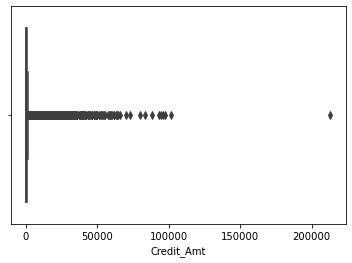

In [46]:
# Average sales
sns.boxplot(sales['Credit_Amt'])

In [47]:
#sales['Inv_Date'] = pd.to_datetime(sales['Inv_Date'], format='%d/%m/%Y', errors='coerce')
sales['year'] = pd.DatetimeIndex(sales['Inv_Date']).year
print(sales.head(5)) #check to see if the year was added as a column
                                             

            Acct_ID            Acct_Desc Inv_Num   Inv_Date  Debit_Amt  \
Customer ID                                                              
WATERO        30020  Sales - Turf Repair   37144 2020-04-01        NaN   
WATERO        30020  Sales - Turf Repair   37147 2020-04-01        NaN   
WATERO        30020  Sales - Turf Repair   37148 2020-04-02        NaN   
WATERO        30020  Sales - Turf Repair   37155 2020-04-03        NaN   
WATERO        30020  Sales - Turf Repair   37172 2020-04-10        NaN   

             Credit_Amt Last_Inv_Date Sales_Rep_ID  \
Customer ID                                          
WATERO          2607.75    2021-12-29       JAMESV   
WATERO          3806.04    2021-12-29       JAMESV   
WATERO          2070.17    2021-12-29       JAMESV   
WATERO          3558.18    2021-12-29       JAMESV   
WATERO          2825.81    2021-12-29       JAMESV   

                                           Job_ID  year  
Customer ID                                 

In [48]:
sales_per_year = sales['year'].value_counts()
print(sales_per_year)
sales_by_ProfitCntr = sales['Acct_ID'].value_counts()
print(sales_by_ProfitCntr)

2010    5519
2007    5333
2011    5047
2008    4906
2009    4564
2019    3925
2005    2982
2018    2964
2013    2936
2006    2927
2020    2882
2014    2844
2015    2747
2021    2731
2017    2111
2012    2031
2016    1782
Name: year, dtype: int64
30200    16893
30400     9674
30810     8335
30820     7529
30900     6913
30800     6215
30100      692
30300      614
30500      529
30803      267
30020      226
30600      110
30700      101
30805       77
30807       38
30801       13
30550        5
Name: Acct_ID, dtype: int64


<AxesSubplot:title={'center':'Total  Number of Sales per Profit Center'}, ylabel='Total # Sales'>

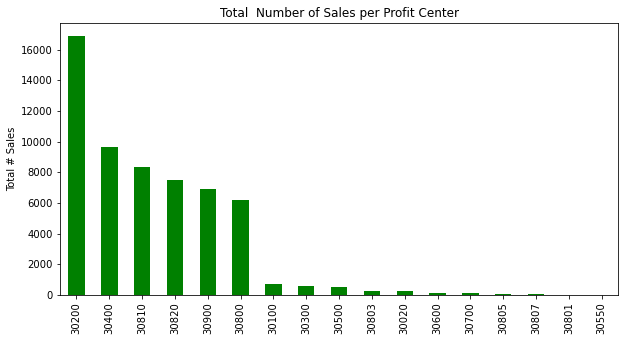

In [49]:
#Total number of sales per revenue stream
fig=plt.figure(figsize= (10,5))
plt.title('Total  Number of Sales per Profit Center',color = 'black')
plt.ylabel('Total # Sales',color = 'black')

sales_by_ProfitCntr.plot(kind='bar',color='green')

In [50]:
salesByAcct = sales.groupby('Acct_ID')['Credit_Amt'].sum()
print(salesByAcct)

Acct_ID
30020      783026.56
30100      515380.55
30200    33942776.41
30300     1517396.47
30400      939052.54
30500       77114.60
30550        5930.29
30600      136113.23
30700       11151.70
30800     3289086.57
30801        8900.00
30803       98907.93
30805       43396.45
30807       30121.85
30810     2475927.28
30820     2215215.37
30900     4487249.76
Name: Credit_Amt, dtype: float64


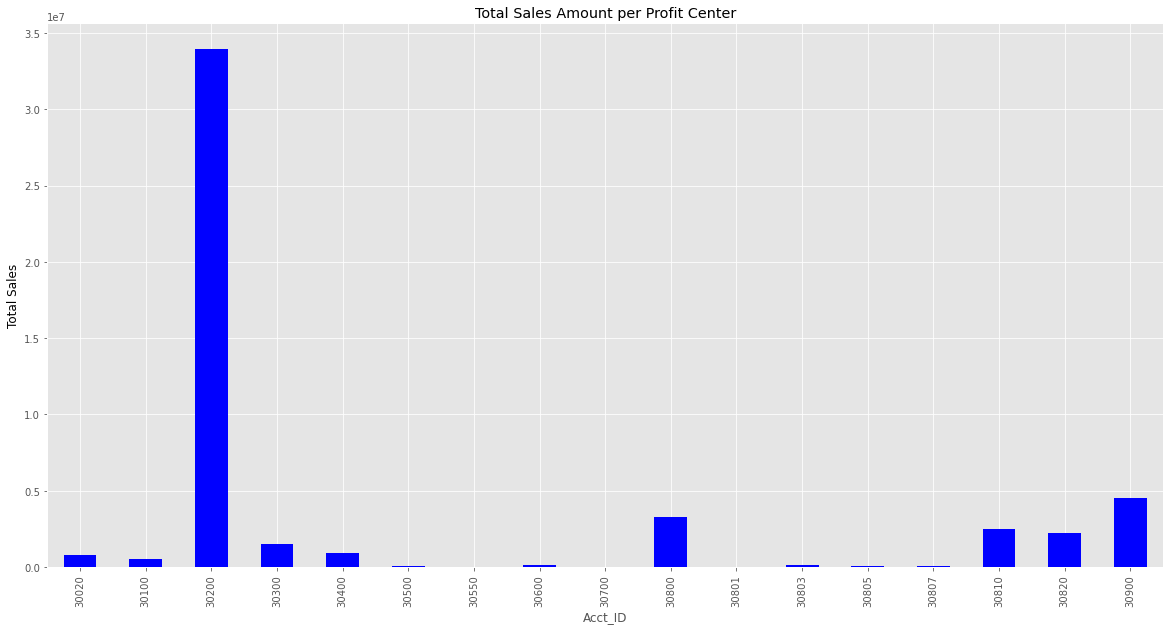

In [51]:
#Total sales per revenue stream
style.use('ggplot')
fig=plt.figure(figsize= (20,10))
salesByAcct.plot(kind='bar',legend=False,x='Acct_ID',y='Credit_Amt',color='blue')
plt.title('Total Sales Amount per Profit Center',color = 'black')
plt.ylabel('Total Sales',color = 'black')
plt.show()


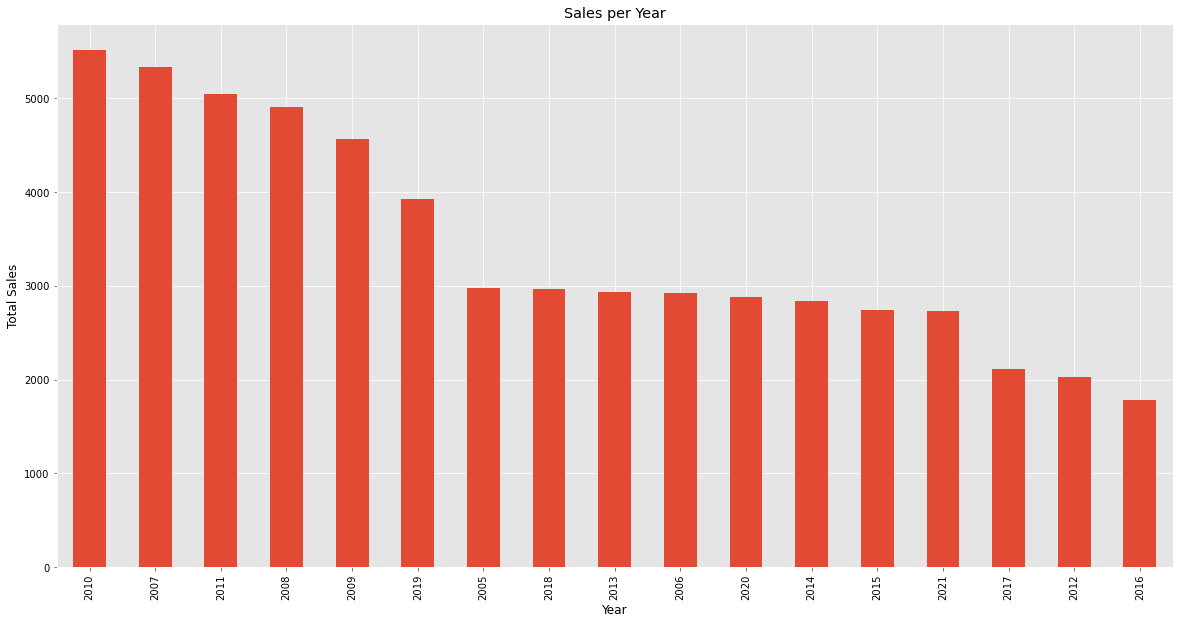

In [52]:
# Show # of sales per year

style.use('ggplot')

fig=plt.figure(figsize= (20,10))

sales_per_year.plot(kind = 'bar', legend = False)
plt.title('Sales per Year',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Total Sales',color = 'black')
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

ANSWERS:
1. - I was surprised to see a credit and a debit column instead of a total sales column. 
   - did not expect nulls in credit and debit columns.
   - Had trouble converting several column datatypes that were type 'object'.  I realized when I converted my excel file into csv file it messed with the data.  I changed to read in my excel file.
   
2. - make sure duplicates found can be deleted..why are they duplicates? I didn't expect any.
   - how to handle the nulls in credit amount. If I make them zero it will skew the mean sales.  I may decide to        delete those rows. 
    
    
3.  - I will have to figure out how to determine if a customer is a repeat customer.  
    - delete rows that have nulls in Credit_Amt
    - eliminate duplicates in customer files and sales files
    - will have to decide how to handle the zip codes that are outside KC area.  These are addresses that are billed out of state but the work is done in town.
    - create total sales column (Credit less Debit)
    - create a new column to determine if this is a repeat customer (if 'invoice date' = 'last inv date' this is not a repeat customer.
    
